<div style="align: center; margin: 0; padding: 0; height: 250px;">
    <br>
    <img src="https://images.ctfassets.net/p6ae3zqfb1e3/3pQAQO2G3wrOcyuCXFbAJd/01f1309dda5327d03a76a051f98f44ac/Citi_Bike_Homepage_Hero_3x__1_.jpg" style="display:block; margin:auto; width:65%; height:100%;">
</div><br><br>

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Citi Bike Trip History Data</strong></p>  
  
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:22px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Module: Ride Duration Prediction using Regression Analysis<br>(EDA and Linear Regression Model Training)</p>    
</div>

**Dataset Info**

> https://citibikenyc.com/system-data

**System Data**

Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? We've heard all of these questions and more from you, and we're happy to provide the data to help you discover the answers to these questions and more. We invite developers, engineers, statisticians, artists, academics and other interested members of the public to use the data we provide for analysis, development, visualization and whatever else moves you.

This data is provided according to the [NYCBS Data Use Policy](https://www.citibikenyc.com/data-sharing-policy).


**Citi Bike Trip Histories**

We publish [downloadable files of Citi Bike trip data](https://s3.amazonaws.com/tripdata/index.html). The data includes:

- Ride ID
- Rideable type
- Started at
- Ended at
- Start station name
- Start station ID
- End station name
- End station ID
- Start latitude
- Start longitude
- End latitude
- End Longitude
- Member or casual ride

Data format previously:

- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations (which we were using more in June and July 2013), and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it's secure).

[Download Citi Bike trip history data](https://s3.amazonaws.com/tripdata/index.html)

**Monthly Operating Reports**

View the [monthly operating reports](https://www.citibikenyc.com/system-data/operating-reports) that we provide to the NYC Department of Transportation.

**Additional Resources**

- The City of New York's [bicycling data](http://www.nyc.gov/html/dot/html/about/datafeeds.shtml#Bikes)
- A group of software developers and data explorers working with data feeds from NYC's Bike Share system and other bike data maintain this [Google Group](https://groups.google.com/forum/#!aboutgroup/citibike-hackers) (note: Citi Bike is not responsible for this group – it is run and maintained by a group of interested private citizens)

**TASK**

The goal of this project is to apply everything we learned in this course and build an end-to-end machine learning project.

Remember that to pass the project, you must evaluate 3 peers. If you don't do that, your project can't be considered compelete.

Submitting

Project Cohort #2

Project:

- Form: https://forms.gle/o1s3NmYE4UmFSMVD7
- Deadline: 21 August (Monday), 23:00 CEST

Peer reviewing:

- Peer review assignments: TBA ("project 2" tab)
- Form: TBA
-  Deadline: TBA

Project feedback: TBA ("feedback-02" tab)

Evaluation criteria
See [here](https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/07-project/README.md)

Questions: https://github.com/DataTalksClub/mlops-zoomcamp/tree/main/cohorts/2023/07-project

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

> ⚠️ Not Recommended conda `base` env, work on `venv`

- https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

```
pip freeze > requirements.txt
conda list -e > requirements.txt

# new conda virtual environment
conda create --name "lin-reg" python=3.10 jupyter -y
conda activate "lin-reg"

# install all package dependencies
pip install -r requirements.txt
conda install -c conda-forge --file=requirements.txt      # mostly not work
conda install -c conda-forge pandas==2.0.2 -q -y

# if The environment is inconsistent, try below
conda update -n base -c defaults conda --force-reinstall
conda install anaconda --force-reinstall

```

**You must use the `--no-deps` option in the pip install command in order to avoid bundling dependencies into your conda-package.**

If you run pip install without the `--no-deps` option, pip will often install dependencies in your conda recipe and those dependencies will become part of your package. This wastes space in the package and `increases the risk of file overlap`, file clobbering, and broken packages.

There might be cases where you want to install a package directly from a local directory or a specific location, without relying on the package indexes. In such situations, you can use the `--no-index` option to tell pip not to look for the package in any indexes.

```
- command1 & command2  # runs simultaneously
- command1 ; command2  # runs sequentially
- command1 && command2 # runs sequentially, runs command2 only if command1 succeeds
- command1 || command2 # runs sequentially, runs command2 only if command1 fails
```

In [1]:
!python -V

Python 3.10.12


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import hstack
from scipy.stats import stats

from sklearn.feature_extraction import DictVectorizer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb
import optuna
from optuna.samplers import TPESampler
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

import os
import sys
import pickle
import zipfile
# import boto3
# import click
# import pathlib
# import argparse
# import requests
# import urllib.request
from glob import glob
# from tqdm import tqdm           # console-based
# from tqdm.notebook import tqdm  # jupyter-based
from tqdm.auto import tqdm        # automatically selects
# tqdm._instances.clear()

# memory management performs garbage collection 
import gc
gc.collect()

0

In [2]:
import os
# Get the current working directory
# current_dir = os.getcwd()

# Create a new directory for storing data
# os.makedirs('./pycode', exist_ok=True)
# os.makedirs('./data', exist_ok=True)
os.makedirs('./output', exist_ok=True)
os.makedirs('./model', exist_ok=True)

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

## Q1. Downloading the data

We'll use [Citi Bike trip data](https://s3.amazonaws.com/tripdata/index.html),
The "JC" in the first file name could possibly refer to Jersey City in New York, which might be the location associated with the Citi Bike data.

Download the data (zip) for May and June 2023. For More look at Operating Reports (pdf).

Read the data for May. How many columns are there?

### Ingest Data [wget](https://linuxways.net/centos/linux-wget-command-with-examples/) or [curl](https://daniel.haxx.se/blog/2020/09/10/store-the-curl-output-over-there/)

In [3]:
# "Citi Bike trip data" Download the data for May 2023
# !curl -s -O --create-dirs --output-dir "./data" https://s3.amazonaws.com/tripdata/202305-citibike-tripdata.csv.zip
# !curl -s -O --create-dirs --output-dir "./data" https://s3.amazonaws.com/tripdata/JC-202305-citibike-tripdata.csv.zip
# !curl -s -O --create-dirs --output-dir "./data" https://mot-marketing-whitelabel-prod.s3.amazonaws.com/nyc/May-2023-Citi-Bike-Monthly-Report.pdf

# "Citi Bike trip data" Download the data for June 2023
# !curl -s -O --create-dirs --output-dir "./data" https://s3.amazonaws.com/tripdata/202306-citibike-tripdata.csv.zip
# !curl -s -O --create-dirs --output-dir "./data" https://s3.amazonaws.com/tripdata/JC-202306-citibike-tripdata.csv.zip

In [20]:
glob('data/*.*')

['data\\JC-202305-citibike-tripdata.csv',
 'data\\JC-202305-citibike-tripdata.csv.zip',
 'data\\JC-202306-citibike-tripdata.csv',
 'data\\JC-202306-citibike-tripdata.csv.zip',
 'data\\JC-202307-citibike-tripdata.csv',
 'data\\JC-202307-citibike-tripdata.csv.zip']

In [21]:
# Read the data for (May 2023)
# Specify the ZIP file path
csv_filename = 'JC-202305-citibike-tripdata.csv'
zip_file_path = f'data/{csv_filename}.zip'
csv_file_path = f'data/{csv_filename}'

# Extract the CSV file from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_filename, path='data/')  # Extract to a specific directory

# Read the extracted CSV file
train_df = pd.read_csv(csv_file_path, low_memory=False)

In [22]:
# apply this model to the validation dataset (June 2023)
# Specify the ZIP file path
csv_filename = 'JC-202306-citibike-tripdata.csv'
zip_file_path = f'data/{csv_filename}.zip'
csv_file_path = f'data/{csv_filename}'

# Extract the CSV file from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_filename, path='data/')  # Extract to a specific directory

# Read the extracted CSV file
test_df = pd.read_csv(csv_file_path, low_memory=False)

In [23]:
print("Shape of DataFrame:", train_df.shape)
train_df.head()

Shape of DataFrame: (96002, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BC145343639B5E5B,classic_bike,2023-05-31 12:27:28,2023-05-31 12:38:36,Pershing Field,JC024,Newport PATH,JC066,40.742675,-74.051806,40.727224,-74.033759,member
1,A0CE41F47514FF5C,classic_bike,2023-05-01 18:12:37,2023-05-01 18:29:03,Pershing Field,JC024,Baldwin at Montgomery,JC020,40.742638,-74.051815,40.723659,-74.064194,casual
2,D588077E3D7E2AFD,electric_bike,2023-05-28 17:37:58,2023-05-28 18:39:39,Pershing Field,JC024,Pershing Field,JC024,40.742677,-74.051789,40.742677,-74.051789,casual
3,89AC48A5584B2DB4,classic_bike,2023-05-27 21:01:37,2023-05-27 21:13:16,Pershing Field,JC024,Manila & 1st,JC082,40.742677,-74.051789,40.721651,-74.042884,member
4,709E0B11AB4A0E6C,classic_bike,2023-05-22 12:38:54,2023-05-22 13:02:13,Pershing Field,JC024,Jersey & 3rd,JC074,40.742677,-74.051789,40.723332,-74.045953,member


In [24]:
print("Shape of DataFrame:", test_df.shape)
test_df.head()

Shape of DataFrame: (97023, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,37BE5FCB1A385CDA,classic_bike,2023-06-27 16:06:27,2023-06-27 16:10:27,Hilltop,JC019,Christ Hospital,JC034,40.731115,-74.057468,40.734786,-74.050444,casual
1,9C96B4C6CBBB31AD,classic_bike,2023-06-24 10:46:58,2023-06-24 10:55:27,Baldwin at Montgomery,JC020,Hamilton Park,JC009,40.723473,-74.064338,40.727596,-74.044247,member
2,C91293605D4BEC07,electric_bike,2023-06-04 20:30:13,2023-06-04 20:34:31,Hilltop,JC019,Brunswick St,JC023,40.731169,-74.057574,40.724176,-74.050656,member
3,2920063442116A46,classic_bike,2023-06-08 19:10:06,2023-06-08 19:13:05,Baldwin at Montgomery,JC020,Astor Place,JC077,40.723499,-74.064335,40.719282,-74.071262,member
4,E205FD8C18BA263A,classic_bike,2023-06-23 18:53:51,2023-06-23 19:17:50,Baldwin at Montgomery,JC020,Adams St & 11 St,HB507,40.723511,-74.064277,40.750916,-74.033541,member


In [76]:
train_df['member_casual'].value_counts()

member_casual
member    69222
casual    26780
Name: count, dtype: int64

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96002 entries, 0 to 96001
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96002 non-null  object 
 1   rideable_type       96002 non-null  object 
 2   started_at          96002 non-null  object 
 3   ended_at            96002 non-null  object 
 4   start_station_name  96002 non-null  object 
 5   start_station_id    96002 non-null  object 
 6   end_station_name    95736 non-null  object 
 7   end_station_id      95736 non-null  object 
 8   start_lat           96002 non-null  float64
 9   start_lng           96002 non-null  float64
 10  end_lat             95865 non-null  float64
 11  end_lng             95865 non-null  float64
 12  member_casual       96002 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.5+ MB


In [26]:
train_df = train_df[train_df.notna()]

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97023 entries, 0 to 97022
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             97023 non-null  object 
 1   rideable_type       97023 non-null  object 
 2   started_at          97023 non-null  object 
 3   ended_at            97023 non-null  object 
 4   start_station_name  96968 non-null  object 
 5   start_station_id    96968 non-null  object 
 6   end_station_name    96662 non-null  object 
 7   end_station_id      96662 non-null  object 
 8   start_lat           97023 non-null  float64
 9   start_lng           97023 non-null  float64
 10  end_lat             96935 non-null  float64
 11  end_lng             96935 non-null  float64
 12  member_casual       97023 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB


In [28]:
test_df = test_df[test_df.notna()]

In [29]:
# train_df.describe(datetime_is_numeric=True).T
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_lat,96002.0,40.732197,0.012364,40.705959,40.721124,40.735208,40.742321,40.755047
start_lng,96002.0,-74.040065,0.011906,-74.086783,-74.045572,-74.037683,-74.030970,-74.023787
end_lat,95865.0,40.732155,0.012546,40.660000,40.719420,40.735208,40.742659,40.849972
end_lng,95865.0,-74.039760,0.012095,-74.110000,-74.044247,-74.037683,-74.030970,-73.905060


In [30]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_lat,97023.0,40.731985,0.012410,40.706575,40.719420,40.734920,40.742258,40.863943
start_lng,97023.0,-74.039809,0.011579,-74.086776,-74.044247,-74.037683,-74.031088,-73.941173
end_lat,96935.0,40.731997,0.012492,40.670000,40.719410,40.734961,40.742258,40.863124
end_lng,96935.0,-74.039593,0.011751,-74.160000,-74.044247,-74.037683,-74.030970,-73.911640


## Q2. Computing duration (Data Preparation)

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in May?

In [31]:
# Convert Datetime
train_df['started_at'] = pd.to_datetime(train_df['started_at'])
train_df['ended_at']  = pd.to_datetime(train_df['ended_at'])

test_df['started_at'] = pd.to_datetime(test_df['started_at'])
test_df['ended_at']  = pd.to_datetime(test_df['ended_at'])

# Calculate duration
train_df['duration'] = train_df['ended_at'] - train_df['started_at']
test_df['duration']  = test_df['ended_at']  - test_df['started_at']

# Display the duration
print(train_df['duration'])

0       0 days 00:11:08
1       0 days 00:16:26
2       0 days 01:01:41
3       0 days 00:11:39
4       0 days 00:23:19
              ...      
95997   0 days 00:26:27
95998   0 days 00:12:55
95999   0 days 00:11:18
96000   0 days 00:07:53
96001   0 days 00:09:08
Name: duration, Length: 96002, dtype: timedelta64[ns]


In [32]:
# Convert duration to minutes
train_df['duration_minutes'] = train_df['duration'].dt.total_seconds() / 60
test_df['duration_minutes']  = test_df['duration'].dt.total_seconds() / 60

# Display the duration in minutes
print(train_df['duration_minutes'])

0        11.133333
1        16.433333
2        61.683333
3        11.650000
4        23.316667
           ...    
95997    26.450000
95998    12.916667
95999    11.300000
96000     7.883333
96001     9.133333
Name: duration_minutes, Length: 96002, dtype: float64


In [33]:
# Compute standard deviation of population via Pandas
std_dev = train_df['duration_minutes'].std(ddof=0)

# Round the result to 2 decimal places
std_dev = round(std_dev, 2)

# Display the standard deviation
print("standard deviation of the trips duration:", std_dev)

standard deviation of the trips duration: 109.4


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>3. Exloratory Data Analysis</strong></h1>   
</div>

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

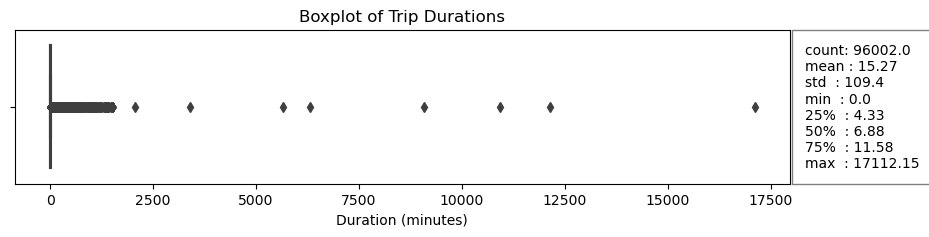

In [34]:
# Create a boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=train_df['duration_minutes'])

# Set title and labels
plt.title("Boxplot of Trip Durations")
plt.xlabel("Duration (minutes)")

# Generate description
description      = train_df['duration_minutes'].describe().round(2)
description_text = "\n".join(f"{stat:<5}: {value}" for stat, value in description.items())

# Add description text
plt.figtext(.915, 0.19, description_text, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 9.5})

# Display the plot
plt.show()

In [35]:
# Specify percentiles for description
train_df[["duration_minutes"]].describe(percentiles=[0.01, 0.035, 0.982, 0.9949]).T

,count,mean,std,min,1%,3.5%,50%,98.2%,99.5%,max
duration_minutes,96002.0,15.267412,109.401606,0.0,0.433333,1.533333,6.883333,68.732433,164.673248,17112.15


In [36]:
# Define criteria for outliers 
lower_threshold = 1   
upper_threshold = 60  

# Filter DataFrame based on outlier criteria
filtered_train_df = train_df[
    (train_df['duration_minutes'] >= lower_threshold) & 
    (train_df['duration_minutes'] <= upper_threshold)
]

# Filter DataFrame based on outlier criteria
filtered_test_df = test_df[
    (test_df['duration_minutes'] >= lower_threshold) & 
    (test_df['duration_minutes'] <= upper_threshold)
]

# Calculate the fraction of records left after dropping outliers
fraction_left = len(filtered_train_df) / len(train_df)
fraction_left = round(fraction_left, 2)

# Display the fraction
print("fraction of the records:", fraction_left)

fraction of the records: 0.96


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>4. Data Preprocessing</strong></h1>   
</div>

## Q4. One-hot encoding (Feature Selection and Handling Categorical Variables)

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [42]:
from sklearn.feature_extraction import DictVectorizer

# Define the categorical columns
categorical_features = [
    'start_station_id',
    'end_station_id'
]
X_train_categorical = filtered_train_df[categorical_features]
X_test_categorical = filtered_test_df[categorical_features]

# Convert categorical features to dictionary-like structures
X_train_cat_dict = X_train_categorical.astype(str).to_dict(orient='records')
X_test_cat_dict  = X_test_categorical.astype(str).to_dict(orient='records')

# Instantiate and fit DictVectorizer for categorical features, use Sparse Representation instead of Dense
dv = DictVectorizer(sparse=True)  # Use sparse=True for memory efficiency

# Perform one-hot encoding on the location IDs
X_train = dv.fit_transform(X_train_cat_dict)
X_test  = dv.transform(X_test_cat_dict)

# Get the dimensionality of the feature matrix
num_columns = X_train.shape[1]

# Display the dimensionality
print("number of columns:", num_columns)

number of columns: 380


In [43]:
with open("model/preprocessor.b", "wb") as f_out:
    pickle.dump(dv, f_out)

In [44]:
# pd.DataFrame.sparse.from_spmatrix(X_train, columns=dv.feature_names_)

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>5. Parametric Model Training</strong></h1>   
</div>

## Implemet Linear Regression

### Vanilla Linear Regression

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [45]:
# Define the target variable
target = 'duration_minutes'
y_train = filtered_train_df[target]

# feature matrix and target array
X_train.shape, y_train.shape

((91733, 380), (91733,))

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize and Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable
y_train_pred = model.predict(X_train)
y_train_pred

array([12.76210722, 13.53062522, 11.15577165, ..., 11.9658451 ,
       12.79450209, 11.9658451 ])

In [47]:
with open('model/lin_reg_model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

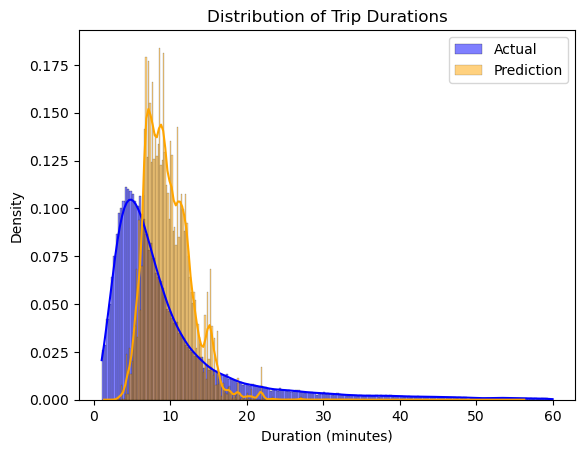

In [48]:
# Create a histogram plot using seaborn with a kernel density estimate line
sns.histplot(
    y_train,
    stat="density", kde=True,
    bins='auto', discrete=False,
    label='Actual', color='blue'
)
sns.histplot(
    y_train_pred,
    stat="density", kde=True,
    bins='auto', discrete=False,
    label='Prediction', color='orange'
)

# Set title and labels
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration (minutes)")

# Display the legend and plot
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE on the training data
rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Display the rounded RMSE
print("RMSE on train:", round(rmse, 2))

RMSE on train: 8.39


In [50]:
from sklearn.metrics import r2_score

# Calculate the R2 on the training data
r2_score(y_train, y_train_pred)

0.11740517727636912

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (June 2023). 

What's the RMSE on validation?

In [52]:
filtered_test_df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_minutes
0,37BE5FCB1A385CDA,classic_bike,2023-06-27 16:06:27,2023-06-27 16:10:27,Hilltop,JC019,Christ Hospital,JC034,40.731115,-74.057468,40.734786,-74.050444,casual,0 days 00:04:00,4.000000
1,9C96B4C6CBBB31AD,classic_bike,2023-06-24 10:46:58,2023-06-24 10:55:27,Baldwin at Montgomery,JC020,Hamilton Park,JC009,40.723473,-74.064338,40.727596,-74.044247,member,0 days 00:08:29,8.483333


In [55]:
# Get the dimensionality of the feature matrix
num_columns = X_test.shape[1]

# Display the dimensionality
print(num_columns)

380


In [56]:
# Define the target variable
y_test = filtered_test_df[target]

# feature matrix and target array
X_test.shape, y_test.shape

((93031, 380), (93031,))

In [57]:
# Predict the target variable
y_test_pred = model.predict(X_test)
y_test_pred

array([10.85002939, 11.21362683,  8.93772939, ...,  8.93110919,
        8.93110919,  8.93110919])

In [58]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE on the training data
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Display the rounded RMSE
print("RMSE on test:", round(rmse, 2))

RMSE on test: 8.28


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>6. Tree Based Model Training</strong></h1>   
</div>

## Implemet Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical(name='n_estimators', choices=[80, 90, 100, 120, 150]),
        'max_depth': trial.suggest_int(name='max_depth', low=3, high=19, step=2),
        'min_samples_split': trial.suggest_int(name='min_samples_split', low=2, high=20, step=3),
        'min_samples_leaf': trial.suggest_int(name='min_samples_leaf', low=1, high=6, step=1),
        'random_state': 101,
        'n_jobs': -1
    }

    # Create and train RandomForestRegressor with suggested hyperparameters
    rf = RandomForestRegressor(**params)
    rf.fit(X_train, y_train)

    # Make predictions on validation data and calculate RMSE
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

In [60]:
# Set the number of trials for optimization
num_trials=40

def optimize_hyperparameters(num_trials):
    # Configure the sampler and create a study
    sampler = TPESampler(seed=101)
    study = optuna.create_study(direction="minimize", sampler=sampler)

    # Optimize the study
    study.optimize(objective, n_trials=num_trials, show_progress_bar=True)
    
    return study

study = optimize_hyperparameters(num_trials)

[I 2023-08-21 19:54:21,878] A new study created in memory with name: no-name-d68a1191-5440-47aa-8861-cd081bc9e06f


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2023-08-21 19:54:33,243] Trial 0 finished with value: 8.104114117861116 and parameters: {'n_estimators': 150, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: 8.104114117861116.
[I 2023-08-21 19:54:39,486] Trial 1 finished with value: 8.109832738236427 and parameters: {'n_estimators': 80, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 0 with value: 8.104114117861116.
[I 2023-08-21 19:54:44,054] Trial 2 finished with value: 8.225834525993807 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 8.104114117861116.
[I 2023-08-21 19:54:47,664] Trial 3 finished with value: 8.219881936411921 and parameters: {'n_estimators': 90, 'max_depth': 11, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 0 with value: 8.104114117861116.
[I 2023-08-21 19:54:54,594] Trial 4 finished with value: 8.105936440627989 and parameters: {'n_estim

In [61]:
with open('model/rf_model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [62]:
# Print the best parameters and the corresponding value
best_params = study.best_params
best_value = study.best_value
print(f"Best Parameters: {best_params}")
print(f"Best RMSE Value: {best_value:.2f}")

Best Parameters: {'n_estimators': 120, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 4}
Best RMSE Value: 8.07


In [63]:
# Get the best trial and its parameters
best_trial = study.best_trial
best_params = best_trial.params
best_value = best_trial.value
print(f"Best Parameters: {best_params}")
print(f"Best RMSE Value: {best_value:.2f}")

Best Parameters: {'n_estimators': 120, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 4}
Best RMSE Value: 8.07


In [64]:
print('Number of finished trials: ', len(study.trials))

Number of finished trials:  40


## Implemet XGBoost Regression

In [65]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [66]:
search_space = {
    'learning_rate': hp.loguniform(label='learning_rate', low=-3, high=0),
    'max_depth': scope.int(hp.quniform(label='max_depth', low=4, high=100, q=1)),
    'min_child_weight': hp.loguniform(label='min_child_weight', low=-1, high=3),
    'reg_alpha': hp.loguniform(label='reg_alpha', low=-5, high=-1),
    'reg_lambda': hp.loguniform(label='reg_lambda', low=-6, high=-1),
    'objective': 'reg:squarederror',
    'seed': 42
}

def objective(params, train=train, val=test):
    # Create and train XGBoost with suggested hyperparameters
    booster = xgb.train(
        params=params,
        dtrain=train,
        num_boost_round=100,
        evals=[(val, 'validation')],
        early_stopping_rounds=15
    )
    # Make predictions on validation data and calculate RMSE
    y_pred = booster.predict(val)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return {'loss': rmse, 'status': STATUS_OK}

In [67]:
import sys
# Set the number of trials for optimization
num_trials=50

# Open the text file for writing
with open('output/output.txt', 'w') as f_out:
    # Redirect the standard output to the file
    original_stdout = sys.stdout
    sys.stdout = f_out
    
    # Optimize the model
    best_result = fmin(
        fn=objective,
        space=search_space,
        algo=tpe.suggest,
        max_evals=num_trials,
        trials=Trials(),
        verbose=True,
        show_progressbar=False  # Suppress the progress bar
    )
    # Restore the standard output
    sys.stdout = original_stdout

    # Print the best hyperparameters
    print("Best Hyperparameters:", best_result)

Best Hyperparameters: {'learning_rate': 0.5071044485453926, 'max_depth': 93.0, 'min_child_weight': 19.897217893181395, 'reg_alpha': 0.16265686655895775, 'reg_lambda': 0.0396241828328032}


In [68]:
best_params = {
    'learning_rate': 0.5071044485453926,
    'max_depth': 93,
    'min_child_weight': 19.897217893181395,
    'reg_alpha': 0.16265686655895775,
    'reg_lambda': 0.0396241828328032,
    'objective': 'reg:squarederror',
    'seed': 42
}
# Create and train XGBoost with suggested hyperparameters
booster = xgb.train(
    params=best_params,
    dtrain=train,
    num_boost_round=1000,
    evals=[(test, 'validation')],
    early_stopping_rounds=50
)
# Make predictions on validation data and calculate RMSE
y_pred = booster.predict(test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

[0]	validation-rmse:8.93646
[1]	validation-rmse:7.83183
[2]	validation-rmse:7.54382
[3]	validation-rmse:7.45344
[4]	validation-rmse:7.43193
[5]	validation-rmse:7.42375
[6]	validation-rmse:7.41939
[7]	validation-rmse:7.41367
[8]	validation-rmse:7.40630
[9]	validation-rmse:7.40392
[10]	validation-rmse:7.39519
[11]	validation-rmse:7.39076
[12]	validation-rmse:7.38566
[13]	validation-rmse:7.38116
[14]	validation-rmse:7.37552
[15]	validation-rmse:7.37065
[16]	validation-rmse:7.36631
[17]	validation-rmse:7.36257
[18]	validation-rmse:7.35627
[19]	validation-rmse:7.34789
[20]	validation-rmse:7.33961
[21]	validation-rmse:7.33768
[22]	validation-rmse:7.33375
[23]	validation-rmse:7.32825
[24]	validation-rmse:7.32126
[25]	validation-rmse:7.31828
[26]	validation-rmse:7.31218
[27]	validation-rmse:7.31078
[28]	validation-rmse:7.30682
[29]	validation-rmse:7.30271
[30]	validation-rmse:7.30062
[31]	validation-rmse:7.29761
[32]	validation-rmse:7.29322
[33]	validation-rmse:7.29093
[34]	validation-rmse:7.2

7.231523586618995

In [69]:
with open('model/xgb_model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

## Calc Distance via (lat1, lon1, lat2, lon2)

In [70]:
def haversine_distance(row):
    lat1, lon1, lat2, lon2 = row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']
    # Convert latitude and longitude from degrees to radians
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(np.radians, [lat1, lon1, lat2, lon2])

    # Radius of the Earth in kilometers
    radius = 6371.0

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = radius * c
    
    return distance

# Example coordinates (replace with your actual data)
row = {
    'start_lat': 40.7128,
    'start_lng': -74.0060,
    'end_lat': 34.0522,
    'end_lng': -118.2437
}

# Calculate distance
distance_km = haversine_distance(row)
print(f"Distance between points: {distance_km:.2f} kilometers")

Distance between points: 3935.75 kilometers


In [74]:
# Assuming train_df is your DataFrame containing the coordinates
train_df['trip_distance'] = train_df.apply(haversine_distance, axis=1).fillna(0)
train_df['trip_distance']

0        2.294339
1        2.354073
2        0.000000
3        2.455469
4        2.206617
           ...   
95997    0.985810
95998    1.964313
95999    1.964313
96000    1.289818
96001    1.964313
Name: trip_distance, Length: 96002, dtype: float64

In [75]:
train_df['trip_distance'].isna().sum()

0

# End of The Project: Part 1